# Adding visualization to our network

When training real models, it's crucial to see what's happening as the network learns. If you're using TensorFlow or Keras with the TF backend, you can use a visualization tool called TensorBoard. This is a basic demo...

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# for making plots prettier
import seaborn as sns 
sns.set_style('white')

In [3]:
from __future__ import print_function
np.random.seed(1337)  # for reproducibility

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
import notmnist
notmnist_path = "~/class/udacity-deep-learning/notMNIST.pickle"

In [6]:
from display import visualize_keras_model, plot_training_curves

In [7]:
batch_size = 128
nb_classes = 10
nb_epoch = 10

In [8]:
# the data, shuffled and split between train, validation, and test sets
(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = notmnist.load_data(notmnist_path)

Reshape inputs to be flat.
Convert labels to 1-hot encoding.

In [9]:
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 valid samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), name="hidden"))
model.add(Activation('relu', name="ReLU"))
model.add(Dense(10, name="output"))
model.add(Activation('softmax', name="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Understanding the computation graph

Keras has built-in ways to view network. Let's look at them again.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 128)               100480    
_________________________________________________________________
ReLU (Activation)            (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 101,770.0
Trainable params: 101,770.0
Non-trainable params: 0.0
_________________________________________________________________


The `summary()` lets us check that the tensors flowing through the network have the expected shape.

The graphical visualization below is useful for more complex architectures. Here, it's just pretty :)

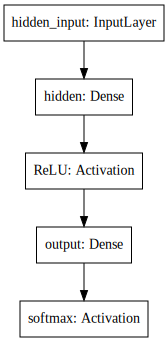

In [13]:
visualize_keras_model(model)

# Adding TensorBoard

(Ref: https://keras.io/callbacks/#tensorboard)

To use TensorBoard in Keras, we need to tell the optimizer to log info as the network learns.

In [14]:
from keras.callbacks import TensorBoard

def make_tb_callback(run):
    """
    Make a callback function to be called during training.
    
    Args:
        run: folder name to save log in. 
    
    Made this a function since we need to recreate it when
    resetting the session. 
    (See https://github.com/fchollet/keras/issues/4499)
    """
    return TensorBoard(
            # where to save log file
            log_dir='./graph-tb-demo/' + run,
            # how often (in epochs) to compute activation histograms
            # (more frequently slows down training)
            histogram_freq=1, 
            # whether to visualize the network graph.
            # This now works reasonably in Keras 2.01!
            write_graph=True,
            # if true, write layer weights as images
            write_images=False)

tb_callback = make_tb_callback('1')


In [15]:
# and add it to our model.fit call
history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=20,
                    verbose=1, validation_data=(x_valid, y_valid),
                    callbacks=[tb_callback])

/Users/shnayder/anaconda/lib/python2.7/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
INFO:tensorflow:Summary name hidden/kernel:0 is illegal; using hidden/kernel_0 instead.
INFO:tensorflow:Summary name hidden/bias:0 is illegal; using hidden/bias_0 instead.
INFO:tensorflow:Summary name output/kernel:0 is illegal; using output/kernel_0 instead.
INFO:tensorflow:Summary name output/bias:0 is illegal; using output/bias_0 instead.
Epoch 1/20
50000/50000 [==============================] - 1s - loss: 0.6063 - acc: 0.8278 - val_loss: 0.5370 - val_acc: 0.8444
Epoch 2/20
50000/50000 [==============================] - 1s - loss: 0.4806 - acc: 0.8602 - val_loss: 0.5005 - val_acc: 0.8554
Epoch 3/20
50000/50000 [==============================] - 1s - loss: 0.4282 - acc: 0.8736 - val_loss: 0.4932 - val_acc: 0.8593
Epoch 4/20
50000/50000 [==============================] - 1s - loss: 0.3910 - acc: 0.8851 - val_loss: 0.4699 - val_acc: 0.8671
Epoch 5/20
50000/50000 [==============================] - 1s - loss: 0.3622 - acc: 0.8958 - val_lo

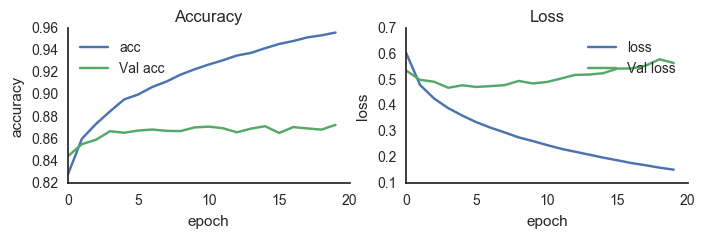

In [16]:
# Let's look at our manually visualized learning curves first
plot_training_curves(history.history);

# TensorBoard visualizations

During (or after) running the above, we can run

```tensorboard --logdir=graph-tb-demo/```

And then open 0.0.0.0:6006 in a browser to take a look at the results. We can see learning curves in the Scalars tab:

## Accuracy:

<img src="img/tb-demo-acc.png" width="400">

## Loss:
<img src="img/tb-demo-loss.png" width="400">

## Validation accuracy
<img src="img/tb-demo-val-acc.png" width="400">

Much the same -- not very interesting so far. But it gets better -- we can e.g. look at histograms of our variables over time. Here's the output distribution: 

<img src="img/tb-demo-output-hist.png" width="400">

We can see that the distribution is shifting to lower values and is getting wider over time.

## Graph

We can also see a much more detailed view of the computation graph. Here's is a partial screenshot:

<img src="img/tb-demo-graph.png" width="400">

(Read the TensorBoard docs for many more details).

We'll use TensorBoard to eval our models later in the workshop.

Let's try our final model with more layers and dropout.

In [17]:
# Uncomment if getting a "Invalid argument: You must feed a value
# for placeholder tensor ..." when rerunning training. 
# https://github.com/fchollet/keras/issues/4499
from keras.layers.core import K
K.clear_session() 
### 

model3 = Sequential()
model3.add(Dense(512, input_shape=(784,), name="hidden1"))
model3.add(Activation('relu', name="ReLU1"))
model3.add(Dropout(0.5))
model3.add(Dense(512, input_shape=(784,), name="hidden2"))
model3.add(Activation('relu', name="ReLU2"))
model3.add(Dropout(0.5))
model3.add(Dense(10, name="output"))
model3.add(Activation('softmax', name="softmax"))

model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [18]:
tb_callback = make_tb_callback('complex')
history = model3.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=20,
                    verbose=1, validation_data=(x_valid, y_valid),
                     # Don't forget to include the callback!
                    callbacks=[tb_callback])

Train on 50000 samples, validate on 10000 samples
INFO:tensorflow:Summary name hidden1/kernel:0 is illegal; using hidden1/kernel_0 instead.
INFO:tensorflow:Summary name hidden1/bias:0 is illegal; using hidden1/bias_0 instead.
INFO:tensorflow:Summary name hidden2/kernel:0 is illegal; using hidden2/kernel_0 instead.
INFO:tensorflow:Summary name hidden2/bias:0 is illegal; using hidden2/bias_0 instead.
INFO:tensorflow:Summary name output/kernel:0 is illegal; using output/kernel_0 instead.
INFO:tensorflow:Summary name output/bias:0 is illegal; using output/bias_0 instead.
Epoch 1/20
50000/50000 [==============================] - 7s - loss: 0.6985 - acc: 0.7953 - val_loss: 0.5253 - val_acc: 0.8388
Epoch 2/20
50000/50000 [==============================] - 6s - loss: 0.5590 - acc: 0.8349 - val_loss: 0.4755 - val_acc: 0.8590
Epoch 3/20
50000/50000 [==============================] - 6s - loss: 0.5252 - acc: 0.8445 - val_loss: 0.4631 - val_acc: 0.8613
Epoch 4/20
50000/50000 [=====================

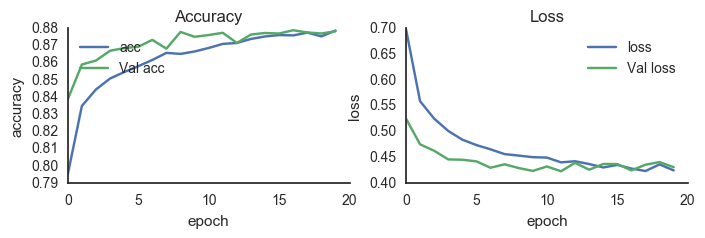

In [19]:
plot_training_curves(history.history);

# Comparing runs

TensorBoard lets us easily compare different runs (when saved to different subfolders). Here are the training and validation accuracy of the two above models:

<img src="img/tb-demo-acc-complex.png" width="400">
<img src="img/tb-demo-val-acc-complex.png" width="400">

We can see that the more complex model generalizes better -- lower training accuracy, but higher validation.